# Not just pictures

For example, we haven't even mentioned the vast SciPy library.

scipy.io has a range of useful functions, like

    scipy.io.loadmat(...)
    
See scipy.org for more info.

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

In [2]:
from scipy.io import wavfile

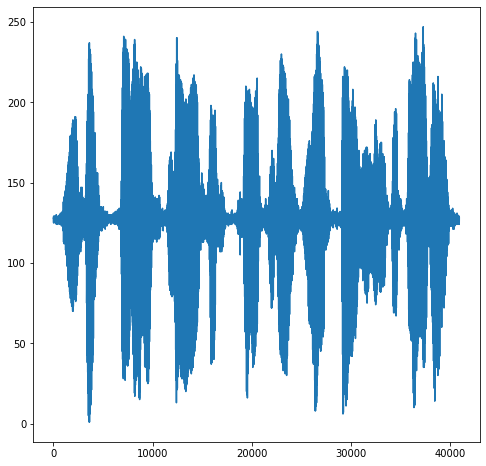

In [3]:
sample_rate, data = wavfile.read("coconut.wav")
plt.plot(data);

In [4]:
import IPython.display as ipd
ipd.Audio(data=data, rate=sample_rate)

---

### An aside: Displaying things in notebooks

Classes normally display themselves using the `__repr__()` method:

In [5]:
x = [1,2,3]
x.__repr__()

'[1, 2, 3]'

In [6]:
x

[1, 2, 3]

But Jupyter will use a `_repr_html_()` method, if it exists:

In [9]:
class MyList(object):
    
    def __init__(self, items):
        self.items = items
        
    def _repr_html_(self):
        out = "<ul style='background: #e0e0ff; margin: 2em; border: 1px solid gray; padding: 28px'>"
        for i, v in enumerate(self.items):
            out += "<li><i>Item {}:</i> {}</li>".format(i, str(v))
        out += "</ul>"
        return out

In [7]:
x = ["ford", "arthur", "zaphod"]
x

['ford', 'arthur', 'zaphod']

In [10]:
x = MyList(["ford", "arthur", "zaphod"])
x

So you have a huge amount of flexibility in how you display your objects, and of course, there are lots of built-in classes that have a `_repr_html_` method:

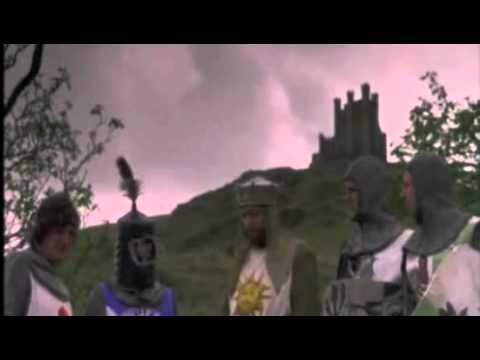

In [11]:
ipd.YouTubeVideo("_iO5SGsWk54")

---

### OK, back to the audio

We can play with audio data just like any other array:

In [12]:
squeakydata=data[::2]
ipd.Audio(data=squeakydata, rate=sample_rate, autoplay=True)

In [13]:
num_samples = len(data)

slowdata = np.interp(
    x  = np.arange(0, num_samples, 0.67),
    
    xp = np.arange(num_samples),
    fp = data
)

ipd.Audio(data=slowdata, rate=sample_rate, autoplay=True)

Suppose we want a whole crowd of Michael Palins?

A quick bit of Jupyter experimentation gave me this:

In [15]:
import random

def make_chorus(data, chorus_size, max_offset, speed_min, speed_max):
    """
    Make a chorus of Michael Palins.
    """
    chorus = np.zeros(int(len(data) / speed_min) + max_offset)
    num_samples = len(data)
    for i in range(chorus_size):
        offset = random.randint(0, max_offset)
        speed = random.uniform(speed_min, speed_max)
        new_length = int(num_samples / speed)
        sample = np.interp(
            x = np.linspace(0, num_samples, num=new_length),
            xp = np.arange(num_samples),
            fp = data
        )
        chorus[offset:(offset+new_length)] += sample
    
    return chorus

chorus = make_chorus(data, chorus_size=4, max_offset=4000, speed_min=0.9, speed_max=1.1)

ipd.Audio(data=chorus,rate=sample_rate)

But suppose we want to play with those parameters a bit more? 

We can use... 

## ipywidgets

In [16]:
import ipywidgets as widgets
w = widgets.IntSlider(min=0, max=20)
w

IntSlider(value=0, max=20)

In [17]:
w

IntSlider(value=0, max=20)

In [19]:
w.value

6

IntSlider(value=4, description='Chorus size', layout=Layout(width='80%'), max=20, style=SliderStyle(descriptio…

IntSlider(value=4000, description='Max Offset (samples)', layout=Layout(width='80%'), max=20000, step=1000, st…

FloatSlider(value=0.9, description='Min speed', layout=Layout(width='80%'), max=2.0, readout_format='.1f', sty…

FloatSlider(value=1.2, description='Max speed', layout=Layout(width='80%'), max=2.0, readout_format='.1f', sty…

Button(description='Generate', layout=Layout(width='80%'), style=ButtonStyle())

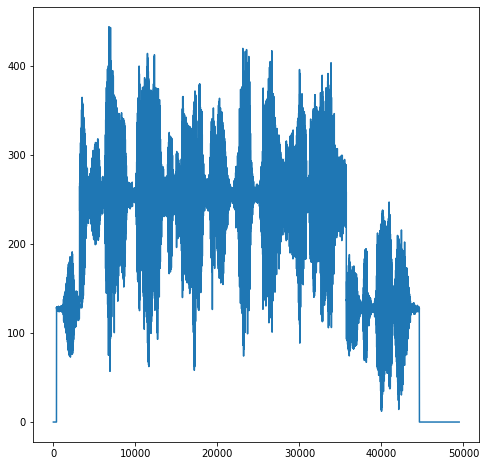

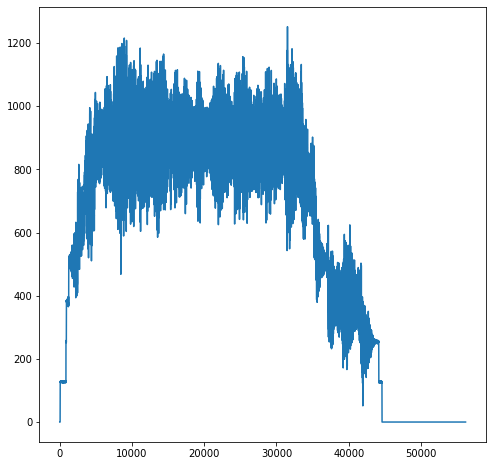

In [20]:
from IPython.display import display

chorus_size = widgets.IntSlider(
    value=4,
    min=0, max=20,
    step=1,
    description="Chorus size",
    readout=True,
    style={'description_width': '30%'},
    layout={'width': '80%'}
)
display(chorus_size)

max_offset = widgets.IntSlider(
    value=4000,
    min=0, max=20000,
    step=1000,
    description="Max Offset (samples)",
    readout=True,
    style={'description_width': '30%'},
    layout={'width': '80%'}
)
display(max_offset)

speed_min = widgets.FloatSlider(
        value=0.9,
        min=0, max=2.0,
        step=0.1,
        description="Min speed",
        readout=True,
        readout_format = '.1f',
        style={'description_width': '30%'},
        layout={'width': '80%'}
)
display(speed_min)

speed_max = widgets.FloatSlider(
        value=1.2,
        min=0, max=2.0,
        step=0.1,
        description="Max speed",
        readout=True,
        readout_format = '.1f',
        style={'description_width': '30%'},
        layout={'width': '80%'}
)
display(speed_max)

def new_chorus(change):
    chorus = make_chorus(
        data, 
        chorus_size=chorus_size.value, 
        max_offset=max_offset.value, 
        speed_min=speed_min.value, 
        speed_max=speed_max.value
    )
    plt.plot(chorus)
    plt.show()
    display(    
        ipd.Audio(
            data=chorus,
            rate=sample_rate
        )
    )


go_but = widgets.Button(description='Generate', layout={'width': '80%'})
go_but.on_click(new_chorus)
ipd.display(go_but)




Let us not go any further. It is a silly place.

---

## Can be for hardware too...

In [21]:
ipd.Video(data="charles_notebook.m4v", width=800)